# EDA for habermans survival dataset.


### what is habermans survival dataset?
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


In [1]:
# import the library to load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("haberman.csv")

Here in the given dataset attribute information is as given below:

   * `Age`: Age of patient at time of operation (numerical)
   
   * `Op_Year`:  Patient's year of operation (year - 1900, numerical)
   
   * `axil_nodes`:  Number of positive axillary nodes detected (numerical)
   
   * `Surv_status`: Survival status (class attribute) 
          1 = the patient survived 5 years or longer
          2 = the patient died within 5 year

In [2]:
data = pd.DataFrame(data)
data.columns = ['Age','Op_Year','axil_nodes','Surv_status']

In [3]:
data.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
print "No. of data points: ",data.shape[0]
print "No. of columns: ",data.shape[1]


No. of data points:  305
No. of columns:  4


In [5]:
data = data.replace({"Surv_status":{1:'Yes',2:'No'}})

In [6]:
data.describe()

,Age,Op_Year,axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


#### For Age:
* Range: (30 - 83)
* median: 52
* mean: 52.53


In [7]:
data['Surv_status'].value_counts(normalize=True)

Yes    0.734426
No     0.265574
Name: Surv_status, dtype: float64

This data set is imbalanced dataset with 73% Yes and 27% No.

## 2D Scatter plot

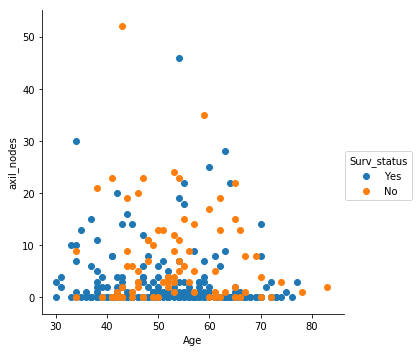

In [8]:
%matplotlib inline
sns.FacetGrid(data,hue='Surv_status',size=5).map(plt.scatter,'Age','axil_nodes').add_legend()

## Pair plot

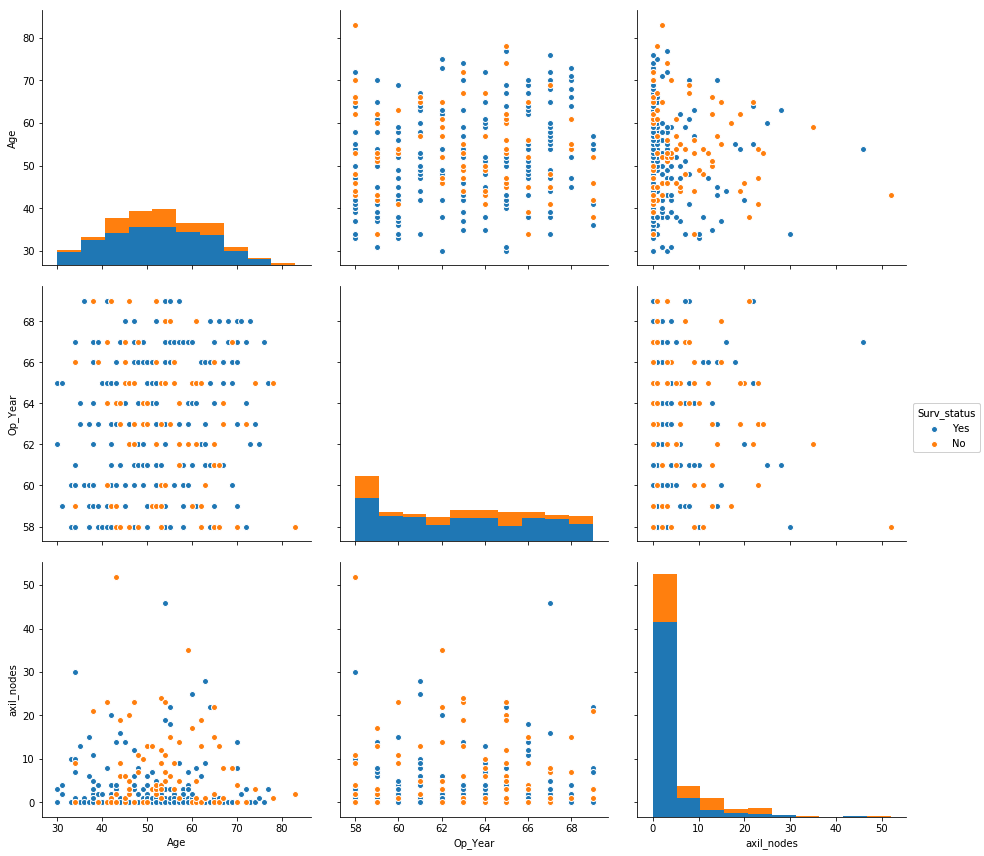

In [9]:
plt.close()
sns.pairplot(data,hue='Surv_status',size=4 ).add_legend()

### Observation:
* we cab not see any linear relationship to classify data based on any combination of attributes.


## Univarint Analysis
It is the examination of the distribution of cases on one variable at a time.

C:\Users\csvankhede\Anaconda\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


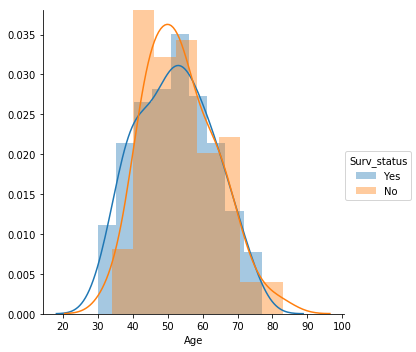

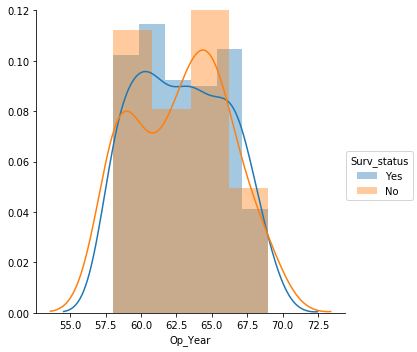

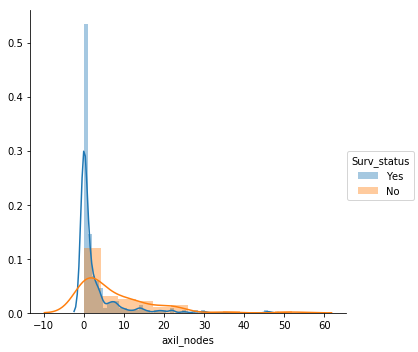

In [10]:
for i,attr in enumerate(list(data.columns)[:-1]):
    sns.FacetGrid(data,hue='Surv_status',size=5).map(sns.distplot,attr).add_legend()

## Observation 
* For Age: Data points are highly densed bitween (40 - 60)
* For Op_Year: most of the data points fall into range (58 - 68)
* For axil_nodes: graph is highly densed between (0 - 5)

## PDF & CDF
**PDF** = probability density function ( smoothed histogram).

**CDF** = Cumulative Distribution Function (It is the area under the PDF).

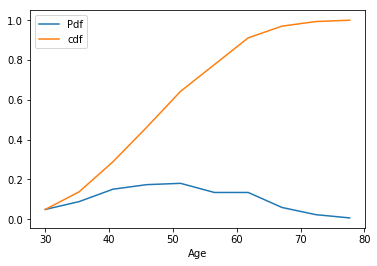

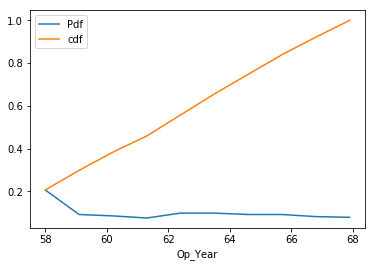

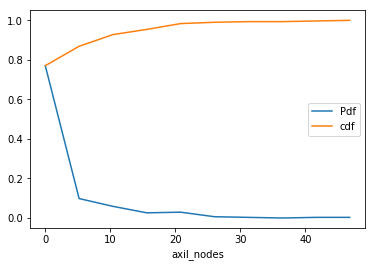

In [15]:
for i,attr in enumerate(list(data.columns)[:-1]):
    counts,edges = np.histogram(data[attr],bins = 10,density=True)
    
    # pdf
    PDF = counts/(sum(counts))
    CDF = np.cumsum(PDF)
    
    plt.plot(edges[:-1],PDF,edges[:-1],CDF)
    plt.legend(['Pdf','cdf'])
    plt.xlabel(attr)
    plt.show()

### Obsevation
* For Age and Op_Year: All data points are evenly distributed.
* for axil_nodes:  80% of the data points fall into range of (0 -5)

### Percentiles, Quartiles, IQR(Interquartile Range), MAD(Mean Absolute Deviation)
* ** Percentile: **  It indicates that what percent of data points fall below the given percentile.
* ** Quartile: ** It divides the data into four equal groups. (0-25, 25-50, 50-75, 75-100)
* ** IQR: ** It is the range of values between 25% to 75%.


In [16]:
from statsmodels import robust
for i,attr in enumerate(list(data.columns)[:-1]):
    print("\nFor {}".format(attr))
    print("Quartiles:")
    print(np.percentile(data[attr],np.arange(0,100,25)))
    
    print("Percentiles:")
    print(np.percentile(data[attr],90))
    
    print('MAD:')
    print(robust.mad(data[attr]))
    


For Age
Quartiles:
[30. 44. 52. 61.]
Percentiles:
67.0
MAD:
11.860817748044816

For Op_Year
Quartiles:
[58. 60. 63. 66.]
Percentiles:
67.0
MAD:
4.447806655516806

For axil_nodes
Quartiles:
[0. 0. 1. 4.]
Percentiles:
13.0
MAD:
1.482602218505602


### Box plot & Violin plot:
**Box-plot** a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles.
![Image of Yaktocat](https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png)
**Violin-plot** It is similar to a box plot with a rotated kernel density plot on each side
![Image of Yaktocat](https://datavizcatalogue.com/methods/images/anatomy/SVG/violin_plot.svg)

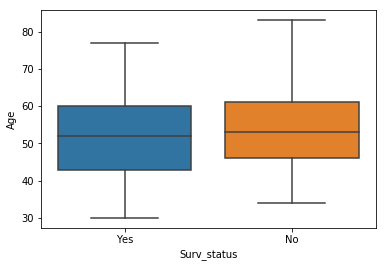

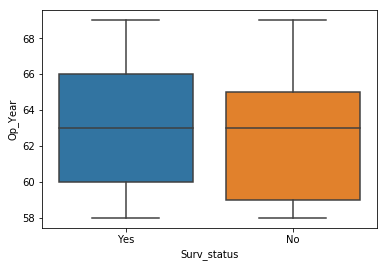

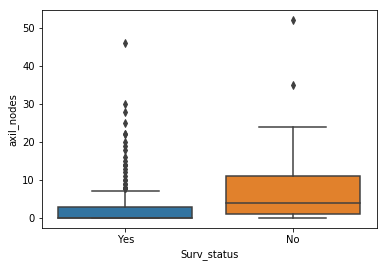

In [19]:
for i,attr in enumerate(list(data.columns)[:-1]):
    sns.boxplot(x=data['Surv_status'],y=data[attr],data=data)
    plt.show()

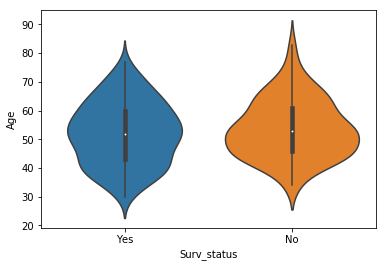

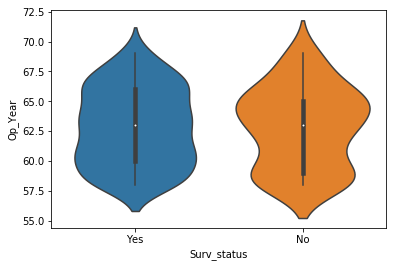

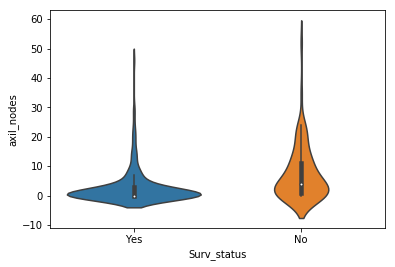

In [20]:
for i,attr in enumerate(list(data.columns)[:-1]):
    sns.violinplot(x=data['Surv_status'],y=data[attr],data=data)
    plt.show()

### Observation:
* After 1966 there is higher change to survive and lower change to survive before 1960.
* axil_nodes greater than 6 has lower chance to survive.
* Before Age of 45 there is higher chance to survive.

### Contour plot

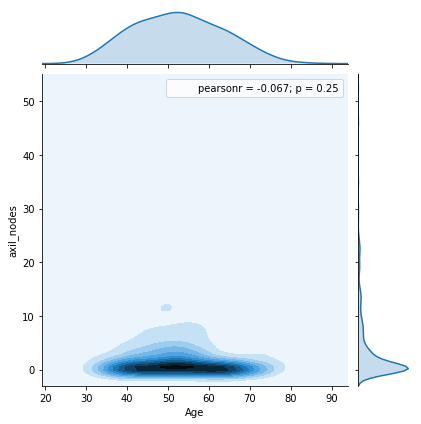

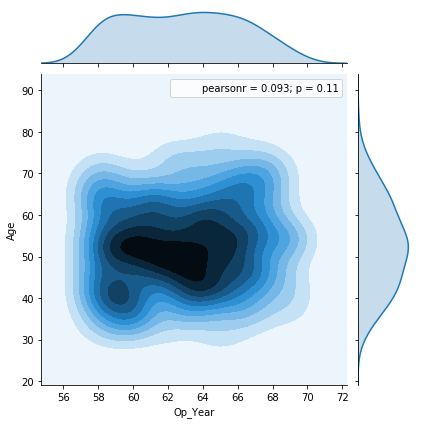

In [21]:
sns.jointplot(x= data['Age'],y=data["axil_nodes"],data=data,kind='kde')
sns.jointplot(x= data['Op_Year'],y=data["Age"],data=data,kind='kde')


### Obsevation
* age (40-65) and axil_node(0-5) has lower chance to survive.
* Age (45-55) and Op-Year(59-65) has lower chance to survive.

### Conclusion
Here in above given dataset all the attribute are highly over lapping each other so it is very hard to find any relationship among them.

Axil_node can be used for classification of survival as well as the age of the patient .